In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from core.adc import ADC
from core.detector import Detector
from core.filter import WindowFilter as Filter
from core.experiment import ExperimentConfig, run_experiment
from core.radiation import RadiationDensity, show_radiation_density
from core.irradiance import show_irradiance

from report import run_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
temperature_range = (500, 1250)  # in celsius
filter = Filter(
    span=(900, 1700),
    edge=50,
)
detector = Detector.G12180
adc = ADC(
    resolution=16,
    log=False,
)

In [3]:
# square
sport_radius = 3*1e-3 / 2  # sport radius, in m
square = (np.pi*sport_radius**2)

# ratio
lens_radius = 0.01  # lens radius, in m
distance = 0.2  # distance, in m
ratio = (np.pi*lens_radius**2) / (2*np.pi*distance**2)

# config
config = ExperimentConfig(
    emissivity=0.8,
    square=square,
    ratio=ratio,
)

ExperimentConfig(emissivity: 0.80, k=8.84E-09, m^2)


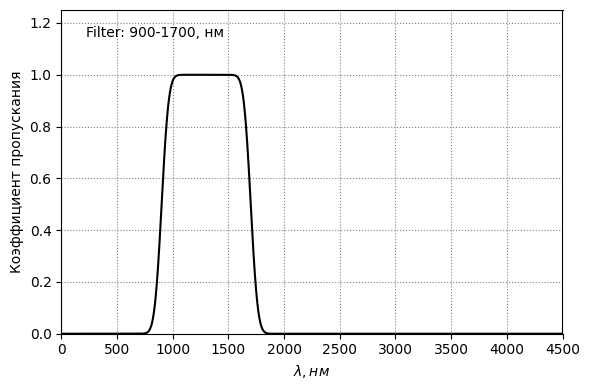

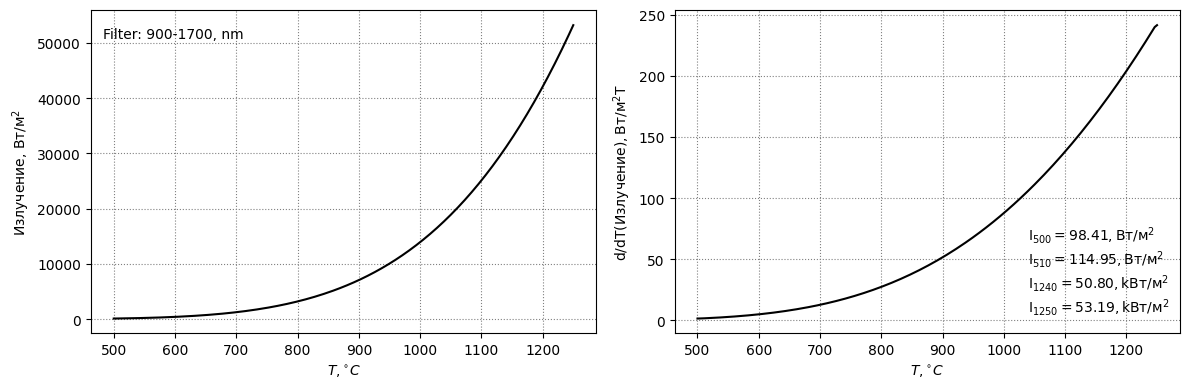

In [4]:
filter.show(info='text', save=True)
show_irradiance(
    temperature_range=temperature_range,
    filter=filter,
    save=True,
)

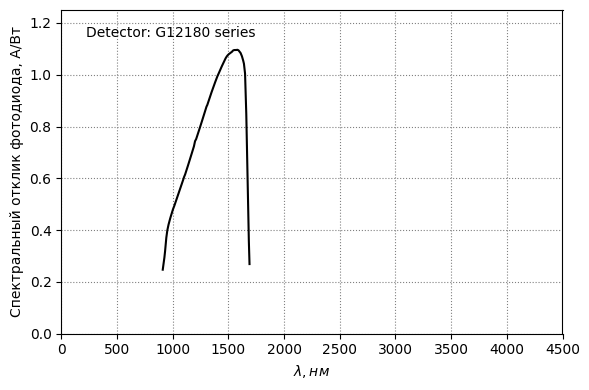

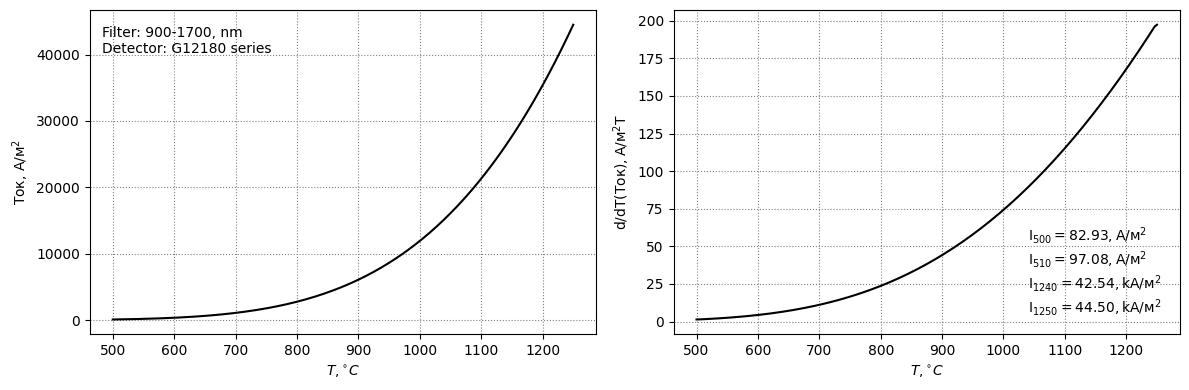

In [5]:
detector.show(info='text', save=True)
show_irradiance(
    temperature_range=temperature_range,
    filter=filter,
    detector=detector,
    save=True,
)

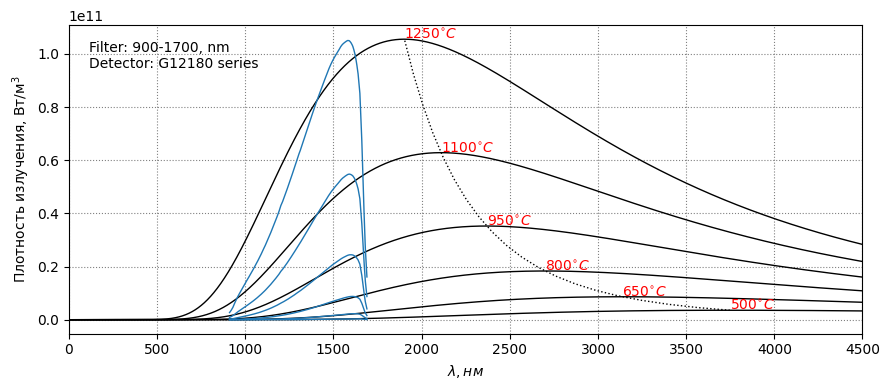

In [6]:
lb, ub = temperature_range

show_radiation_density(
    # temperature=[lb, 650, 900, 1100, 1250],
    temperature=np.linspace(lb, ub, 6),
    filter=filter,
    detector=detector,
    save=True,
)

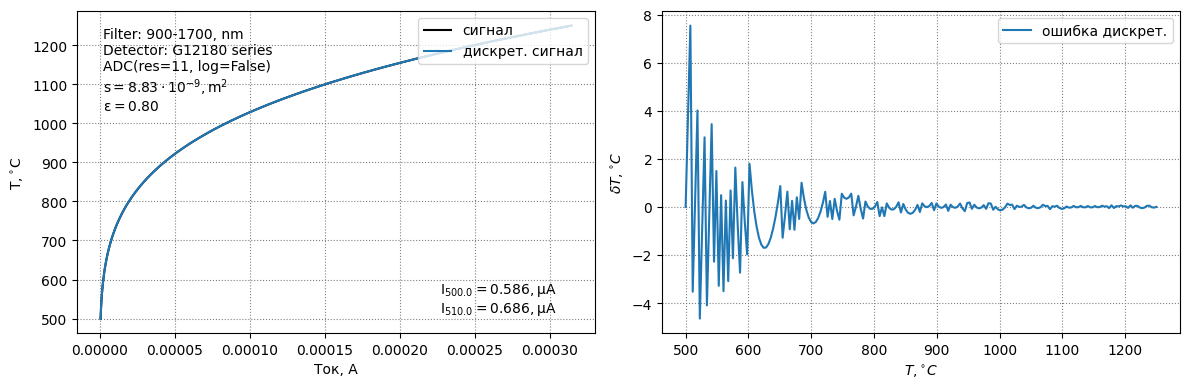

result: None


In [7]:
adc = ADC(
    resolution=11,
    log=False,
)
result = run_experiment(
    temperature_range=temperature_range,
    filter=filter,
    detector=detector,
    adc=adc,
    config=config,
    # relative=True,
    save=True,
)

print(f'result: {repr(result)}')

In [8]:
# run_report(
#     temperature_range=temperature_range,
#     filter=filter,
#     detector=detector,
#     adc=adc,
# )